In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [322]:
df = pd.read_csv(r"C:\Users\pramo\Desktop\jupyter project\Sugarcane Production Analysis-Project\List of Countries by Sugarcane Production.csv")

In [323]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [324]:
df.shape

(103, 7)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


# Data cleaning

In [326]:
df.drop(columns= 'Unnamed: 0',axis=1,inplace= True) #removing unnecessary columns

In [327]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [328]:
#renaming columns name for ease of use
df.rename(columns = {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)": "Production_per_person(kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [329]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,Mexico,North America,56.446.821,452524,781.054,72.27
6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,United States of America,North America,29.926.210,91304,370.53,80.766


In [330]:
#dealing with unstructured numerical data
df["Production(Tons)"] = df["Production(Tons)"].str.replace(".","")
df["Production_per_person(kg)"] = df["Production_per_person(kg)"].str.replace(".","").str.replace(",",".")
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].str.replace(".","")
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].str.replace(".","").str.replace(",",".")

In [331]:
df.head(5)

,Country,Continent,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [332]:
df.nunique()

Country                      103
Continent                      6
Production(Tons)             103
Production_per_person(kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [333]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [334]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [335]:
df.dropna(inplace=True)

In [336]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [337]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [338]:
df["Production(Tons)"] = df["Production(Tons)"].astype('float')
df["Production_per_person(kg)"] = df["Production_per_person(kg)"].astype('float')
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype('float')
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype('float')

In [339]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [340]:
df= df.sort_values(by = ['Production(Tons)','Production_per_person(kg)','Acreage(Hectare)','Yield(Kg/Hectare)'],ascending = False).reset_index(drop= True)

In [341]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


## univariate analysis

Checking How many countries produce sugarcane from each continent?

In [342]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

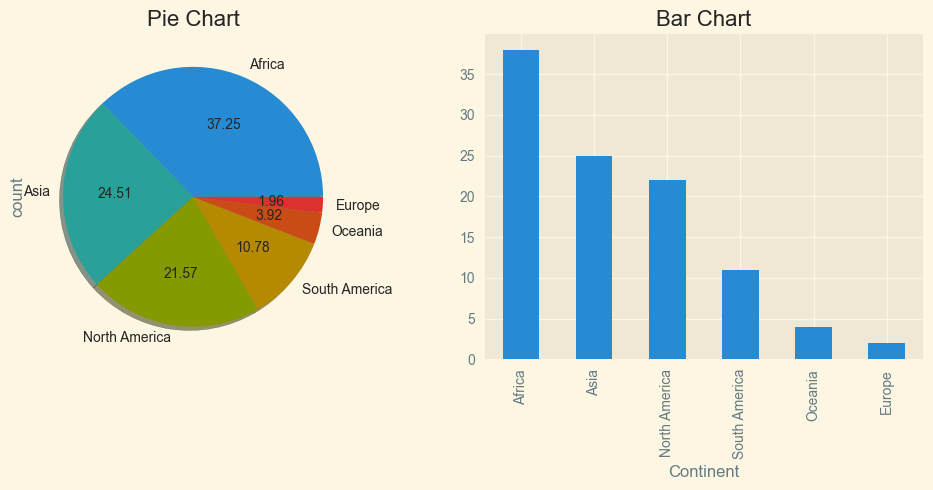

In [389]:
plt.figure(figsize=(10, 5))
# Create subplot 1 (Pie chart)
plt.subplot(1, 2, 1)
df["Continent"].value_counts().plot(kind="pie", autopct='%.2f', shadow=True)
plt.title("Pie Chart")

# Create subplot 2 (Bar chart)
plt.subplot(1, 2, 2)
df["Continent"].value_counts().plot(kind="bar")
plt.title("Bar Chart")

plt.tight_layout()
plt.show()

In [344]:
df.describe()

,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Checking outliers

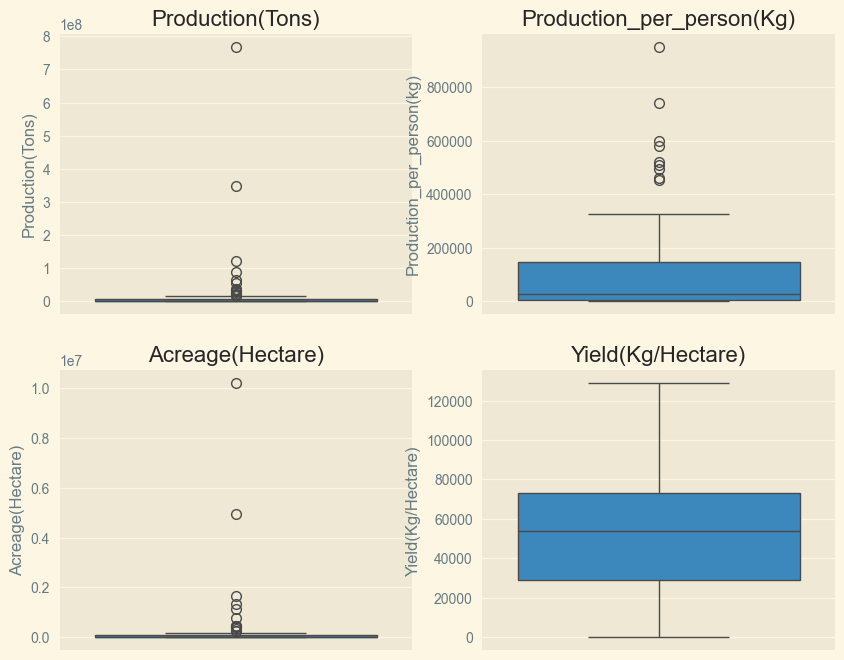

In [345]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

every column has outliers except Yield(Kg/Hectare) column

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of the columns

C:\Users\pramo\AppData\Local\Temp\ipykernel_1968\4275658399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\pramo\AppData\Local\Temp\ipykernel_1968\4275658399.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(kg)"])
C:\Users\pramo\

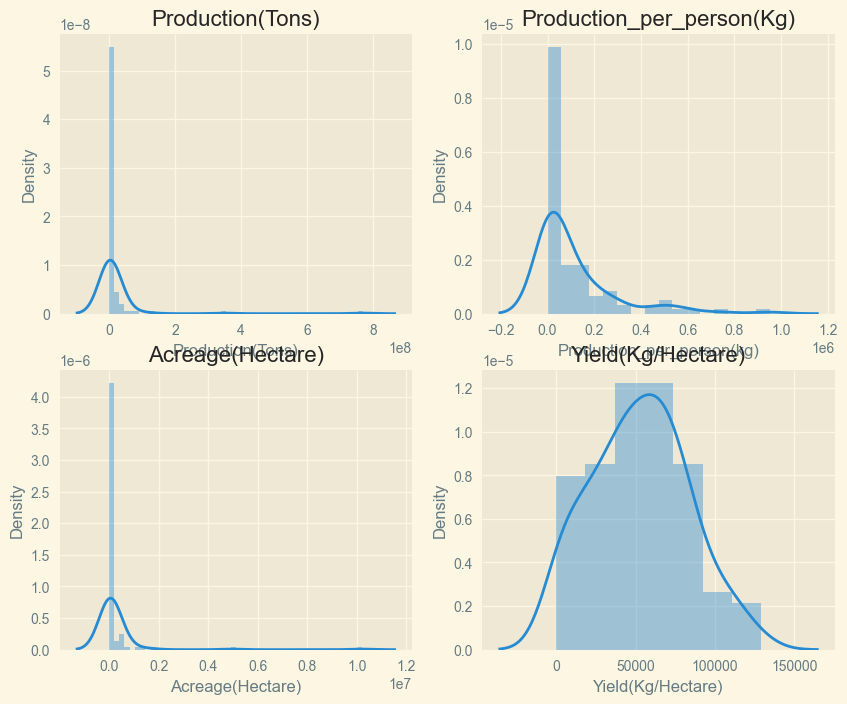

In [346]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

# Bivariate Analysis

In [347]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


checking Which country produces maximum sugarcane?

In [362]:
new_df = df[['Country','Production(Tons)','Production_per_person(kg)','Acreage(Hectare)','Yield(Kg/Hectare)']]

In [363]:
new_df

,Country,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,768678382.0,3668.531,10226205.0,75167.5
1,India,348448000.0,260721.000,4950000.0,70393.5
2,China,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...
97,Lebanon,97.0,16.000,3.0,28386.4
98,Singapore,50.0,9.000,2.0,25.0
99,Samoa,12.0,6.000,1.0,11949.8
100,Saint Lucia,10.0,55915.000,125.0,80.0


In [374]:
new_df['production_percentage']= new_df['Production(Tons)']*100/new_df['Production(Tons)'].sum()

In [375]:
new_df

,Country,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare),production_percentage
0,Brazil,768678382.0,3668.531,10226205.0,75167.5,4.072729e+01
1,India,348448000.0,260721.000,4950000.0,70393.5,1.846200e+01
2,China,123059739.0,88287.000,1675215.0,73459.1,6.520138e+00
3,Thailand,87468496.0,1264.303,1336575.0,65442.2,4.634389e+00
4,Pakistan,65450704.0,324219.000,1130820.0,57879.0,3.467809e+00
...,...,...,...,...,...,...
97,Lebanon,97.0,16.000,3.0,28386.4,5.139401e-06
98,Singapore,50.0,9.000,2.0,25.0,2.649176e-06
99,Samoa,12.0,6.000,1.0,11949.8,6.358022e-07
100,Saint Lucia,10.0,55915.000,125.0,80.0,5.298352e-07


plotting in pie

<Axes: ylabel='production_percentage'>

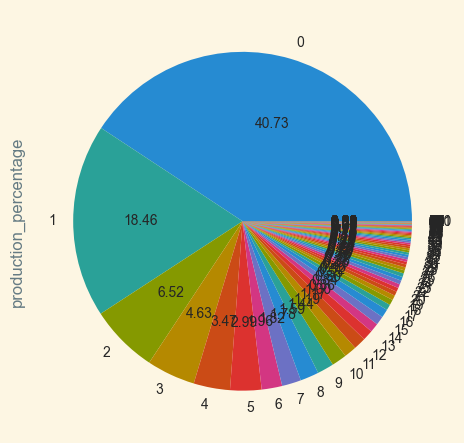

In [376]:
new_df['production_percentage'].plot(kind='pie',autopct='%.2f')

Brazil, India and China have 65% of production of sugarcane

In [377]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

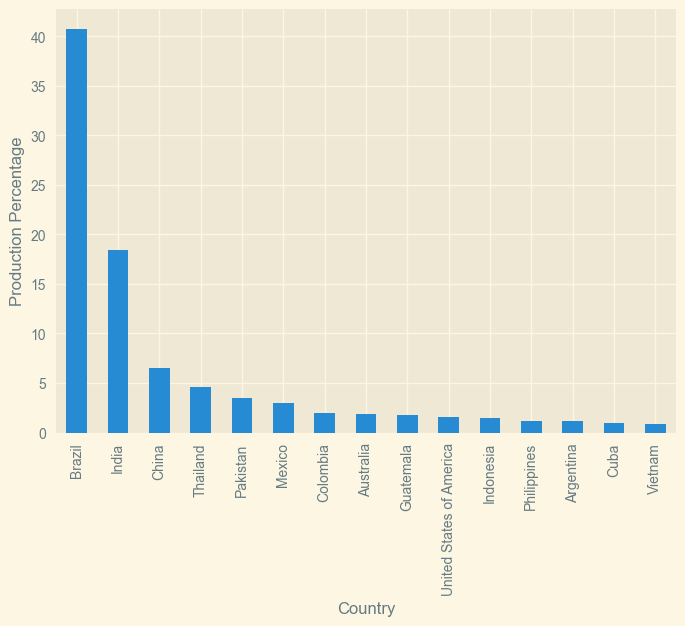

In [396]:
#Sort the DataFrame by 'production_percentage' column in descending order and select top 15 entries
sorted_df = new_df[['Country', 'production_percentage']].sort_values('production_percentage', ascending=False).head(15)

# Set the plot style
plt.style.use('Solarize_Light2')

# Plotting the data
ax = sorted_df.plot(kind='bar', x='Country', y='production_percentage', legend=False)

# Adding labels to the axes
plt.xlabel('Country')
plt.ylabel('Production Percentage')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

The country "Brazil" produces maximum sugarcane out of all countries.

Checking Which country has highest land?

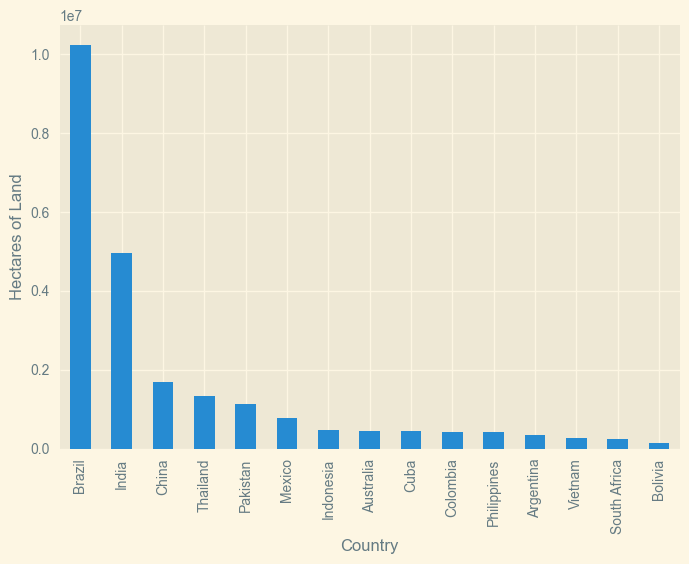

In [397]:
# Sort the DataFrame by 'Acreage(Hectare)' column in descending order and select top 15 entries
sorted_df = new_df[['Country', 'Acreage(Hectare)']].sort_values('Acreage(Hectare)', ascending=False).head(15)

# Set the plot style
plt.style.use('Solarize_Light2')

# Plotting the data
ax = sorted_df.plot(kind='bar', x='Country', y='Acreage(Hectare)', legend=False)

# Adding labels to the axes
plt.xlabel('Country')
plt.ylabel('Hectares of Land')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

In [398]:
print(new_df.columns)

Index(['Country', 'Production(Tons)', 'Production_per_person(kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)', 'production_percentage'],
      dtype='object')


Checking Which country has highest yield per hectare?

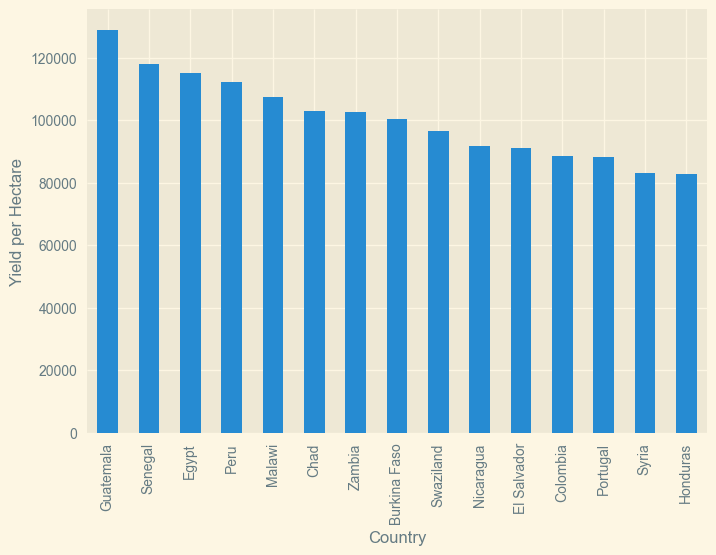

In [399]:
# Sort the DataFrame by 'Yield(Kg/Hectare)' column in descending order and select top 15 entries
sorted_df = new_df[['Country', 'Yield(Kg/Hectare)']].sort_values('Yield(Kg/Hectare)', ascending=False).head(15)

# Set the plot style
plt.style.use('Solarize_Light2')

# Plotting the data
ax = sorted_df.plot(kind='bar', x='Country', y='Yield(Kg/Hectare)', legend=False)

# Adding labels to the axes
plt.xlabel('Country')
plt.ylabel('Yield per Hectare')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

Checking Which country has highest production?

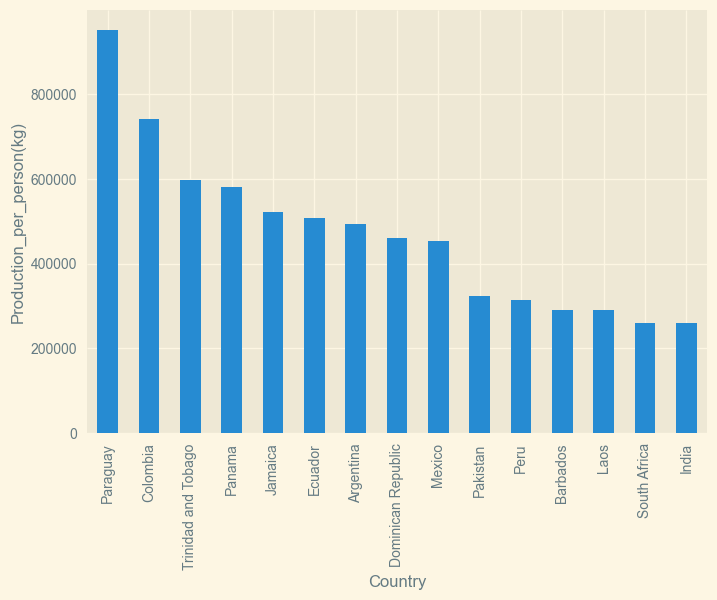

In [400]:
# Sort the DataFrame by 'Production_per_person(kg)' column in descending order and select top 15 entries
sorted_df = new_df[['Country', 'Production_per_person(kg)']].sort_values('Production_per_person(kg)', ascending=False).head(15)

# Set the plot style
plt.style.use('Solarize_Light2')

# Plotting the data
ax = sorted_df.plot(kind='bar', x='Country', y='Production_per_person(kg)', legend=False)

# Adding labels to the axes
plt.xlabel('Country')
plt.ylabel('Production_per_person(kg)')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()

Production per Person is highest in Paraguay

# correlation

In [410]:
# Selecting only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Computing the correlation matrix
correlation = numeric_df.corr()

# Displaying the correlation in tabular format with color gradient
styled_correlation_matrix = correlation.style.background_gradient(cmap='coolwarm')

styled_correlation_matrix

,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

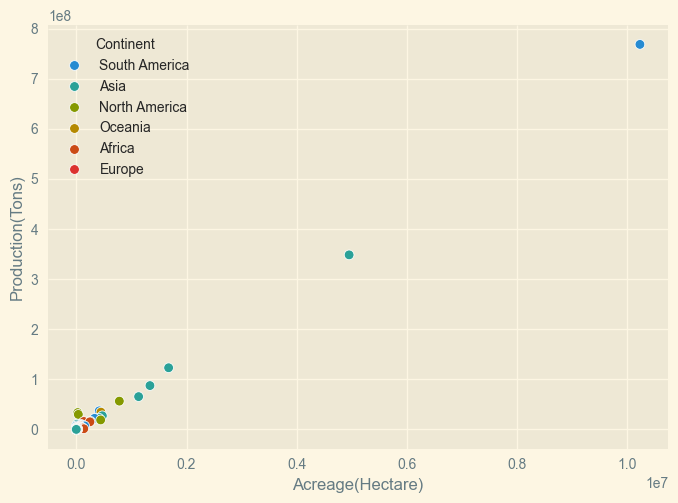

In [412]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

Overall increase in land increases the production

Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

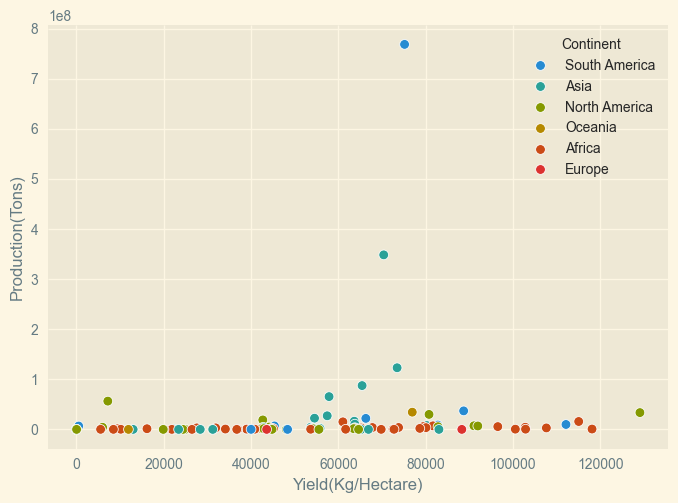

In [413]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [414]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [415]:
df_continent = df.groupby("Continent").sum()

In [416]:
df_continent

,Country,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [418]:
df_continent["number_of_countries"]= df.groupby("Continent").count()["Country"]

In [419]:
df_continent

,Country,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

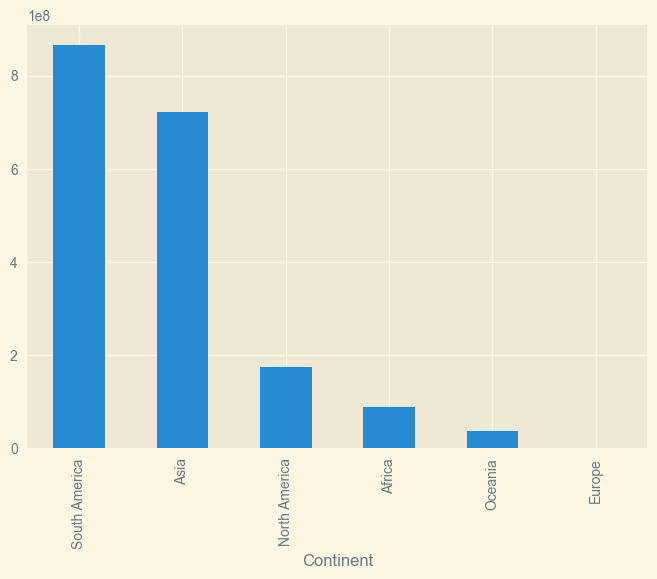

In [420]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

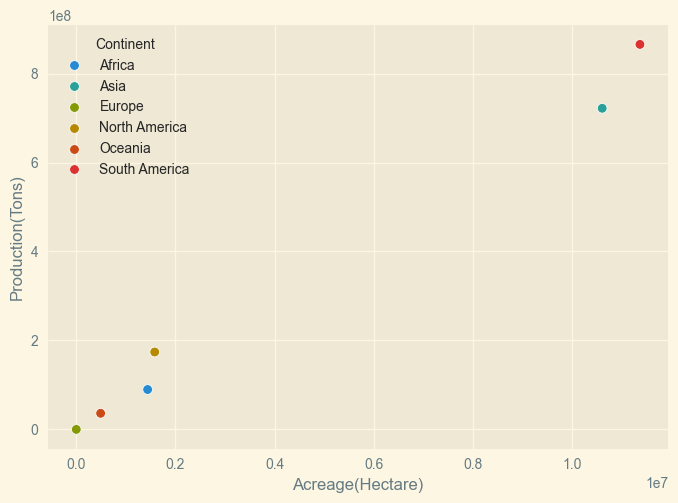

In [424]:
sns.scatterplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" ,hue = "Continent")

Production distribution by continent

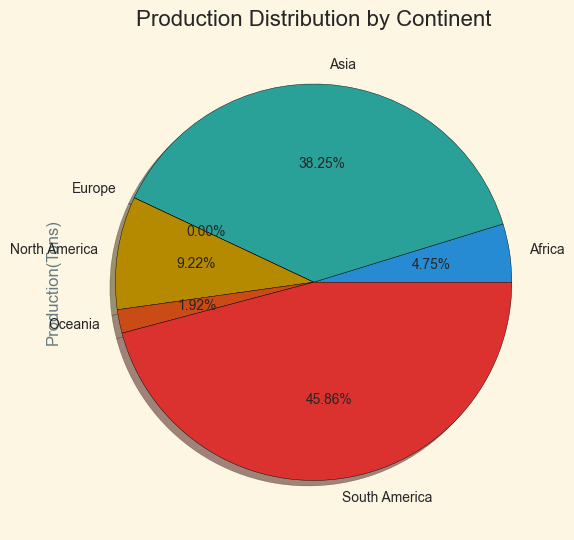

In [430]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%",shadow=True,wedgeprops= {'edgecolor':'black'})
plt.title('Production Distribution by Continent')
plt.tight_layout()
plt.show()

Correlation for continent

In [433]:
# Selecting only numeric columns from the DataFrame
numeric_df_continent = df_continent.select_dtypes(include='number')

# Computing the correlation matrix
correlation_continent = numeric_df_continent.corr()

# Displaying the correlation in tabular format with color gradient
styled_correlation_matrix = correlation_continent.style.background_gradient(cmap='coolwarm')

styled_correlation_matrix


,Production(Tons),Production_per_person(kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
